In [1]:
import numpy as np
import scipy.stats as sps
from glob import glob
import matplotlib.pyplot as plt
import ROOT as rt
import root_numpy as rtnp
import sys, os, yaml
sys.path.append('../lib')
sys.path.append('../analysis')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, SetMaxToMaxHist, make_ratio_plot
from cebefo_style import Set_2D_colz_graphics
from progressBar import ProgressBar
from categoriesDef import categories

from analysis_utilities import drawOnCMSCanvas, getEff

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Internal"

donotdelete = []

Welcome to JupyROOT 6.12/07


In [2]:
# load FWLite C++ libraries
rt.gSystem.Load("libFWCoreFWLite.so");
rt.gSystem.Load("libDataFormatsFWLite.so");
rt.FWLiteEnabler.enable()

# load FWlite python libraries
from DataFormats.FWLite import Events
from DataFormats.FWLite import Handle

In [16]:
fileNamesFile = '../../work/CMSSW_10_2_3/src/ntuplizer/BPH_RDntuplizer/production/inputFiles_BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3.txt'
fileNames = ['/mnt/hadoop' + f[:-1] for f in open(fileNamesFile, 'r').readlines()]


In [29]:
handle = {}
handle['genP'] = [Handle('std::vector<reco::GenParticle>'), 'prunedGenParticles']
N_vtx_MINIAOD = []

ftest_list = np.random.choice(fileNames, 10)

outNB0 = []
outMuPt = []
for i_f, fn in enumerate(ftest_list):
    print 'File', i_f
    for ie, event in enumerate(Events(fn)):
        prods = {}
        for k,v in handle.iteritems():
            event.getByLabel(v[1], v[0])
            prods[k] = v[0].product()
        nB0 = 0
        mu_pt = []
        for p in prods['genP']:
            if p.pdgId() != 511 or p.numberOfDaughters()<=1:
                continue
            nB0 += 1
            for d in p.daughterRefVector():
                if d.pdgId() == -13:
                    mu_pt.append(d.pt())
        outNB0.append(nB0)
        if nB0 == 2:
            outMuPt.append(mu_pt)
outMuPt = np.array(outMuPt)
outNB0 = np.array(outNB0)

File 0
File 1
File 2
File 3
File 4
File 5
File 6
File 7
File 8
File 9


(array([1.7972e+04, 0.0000e+00, 2.7770e+03, 0.0000e+00, 0.0000e+00,
        4.0000e+01, 0.0000e+00, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

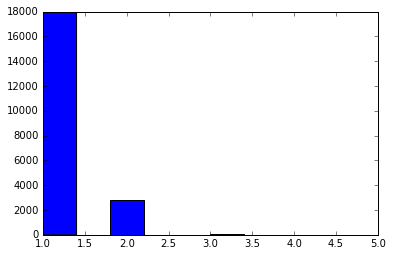

In [30]:
plt.hist(outNB0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


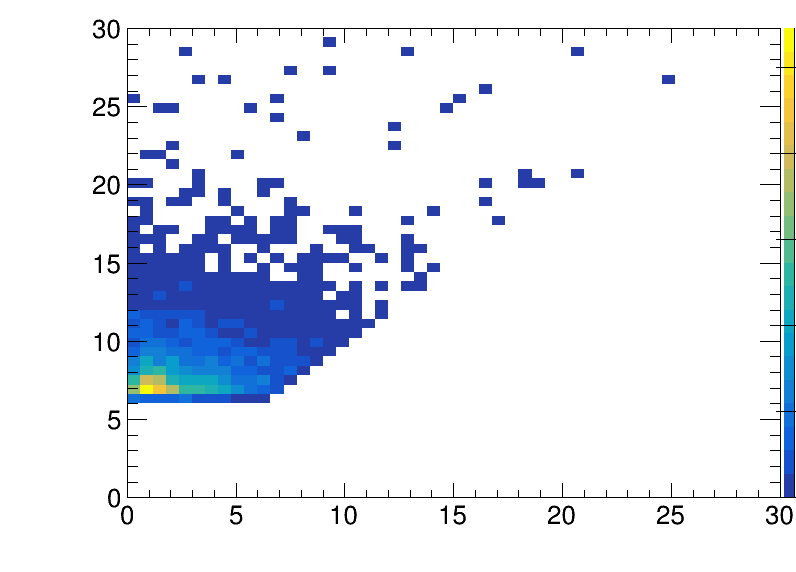

In [31]:
x = np.min(outMuPt, axis=1)
y = np.max(outMuPt, axis=1)
h2 = create_TH2D(np.column_stack((x,y)), binning=[50, 0, 30, 50, 0, 30])

c = rt.TCanvas('c', 'c', 800, 600)
h2.Draw('colz')
c.Draw()

In [38]:
np.sum(x > 7)/float(x.shape[0])

0.08966510622974433

In [34]:
1 - np.sum(outNB0 == 1)/float(outNB0.shape[0])

0.1357537869680212

In [39]:
0.089*0.135

0.012015